# Problema 2

- B (boala pulmonara)
- T (tuse)
- D (Dificultate de respiratie)
- X (Radiografie anormala)

B, T, D, X = {1, 2} (Variabile Binare)

In [7]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = BayesianNetwork([
    ('B', 'T'),
    ('B', 'X'),
    ('B', 'D'),
    ('T', 'D'),
])

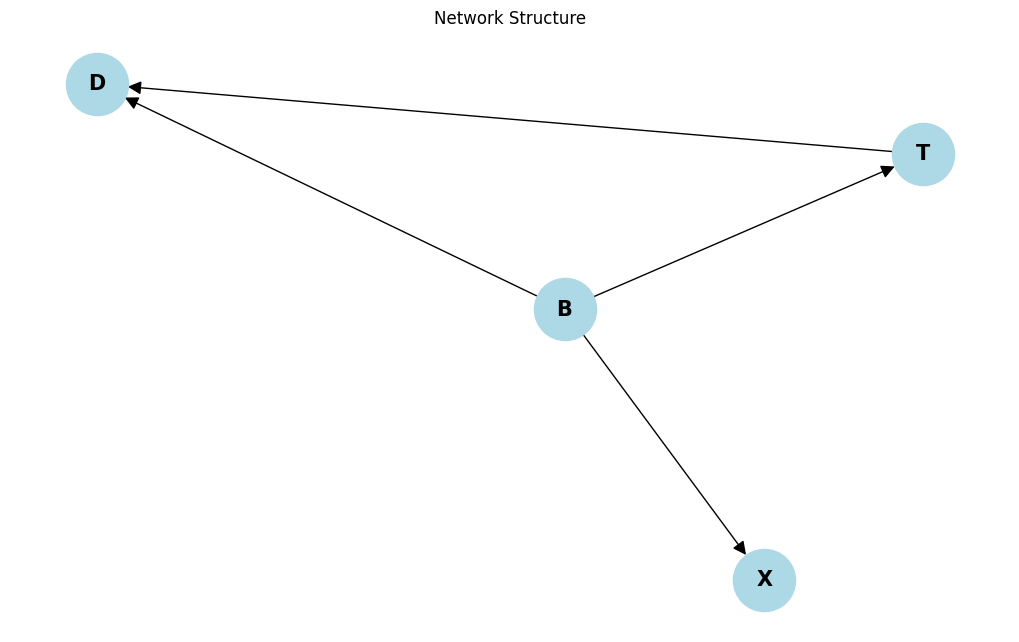

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.DiGraph()
graph.add_edges_from(model.edges())

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)

plt.title('Network Structure')
plt.show()

In [10]:
# 1. Probabilitatea apriori pentru boala pulmonară B
cpd_B = TabularCPD(variable='B', variable_card=2, values=[[0.9], [0.1]])

# 2. Probabilitatea pentru tuse (T) condiționată de boala (B)
cpd_T = TabularCPD(variable='T', variable_card=2, 
                values=[[0.7, 0.2],  # P(T=0|B=0), P(T=0|B=1)
                        [0.3, 0.8]], # P(T=1|B=0), P(T=1|B=1)
                evidence=['B'], evidence_card=[2])

# 3. Probabilitatea pentru radiografie anormală (X) condiționată de boala (B)
cpd_X = TabularCPD(variable='X', variable_card=2, 
                values=[[0.9, 0.1],  # P(X=0|B=0), P(X=0|B=1)
                        [0.1, 0.9]], # P(X=1|B=0), P(X=1|B=1)
                evidence=['B'], evidence_card=[2])

# 4. Probabilitatea pentru dificultatea de respirație (D) condiționată de boala (B) și tuse (T)
cpd_D = TabularCPD(variable='D', variable_card=2, 
                values=[[0.9, 0.6, 0.5, 0.1],  # P(D=0|B,T)
                        [0.1, 0.4, 0.5, 0.9]], # P(D=1|B,T)
                evidence=['B', 'T'], evidence_card=[2, 2])

In [12]:
model.add_cpds(cpd_B, cpd_T, cpd_X, cpd_D)
model.check_model()
infer = VariableElimination(model)

In [16]:
posterior_B = infer.query(["B"], evidence={"T": 1, "D": 1})
print(posterior_B)

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.6000 |
+------+----------+
| B(1) |   0.4000 |
+------+----------+


In [17]:
posterior_X = infer.query(variables=['X'], evidence={'B': 0})
print(posterior_X)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9000 |
+------+----------+
| X(1) |   0.1000 |
+------+----------+
